In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv("21-housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


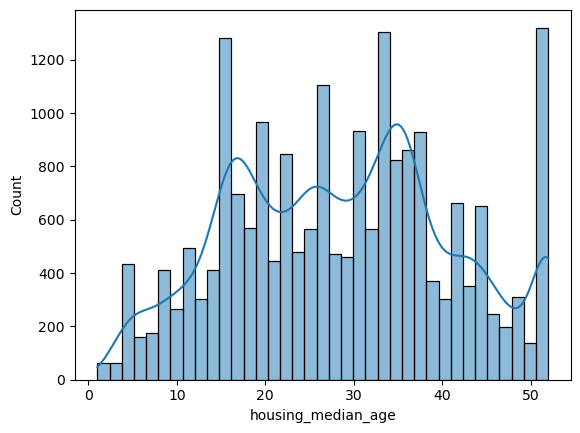

In [8]:
sns.histplot(data=df, x="housing_median_age", kde=True)
plt.show()

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

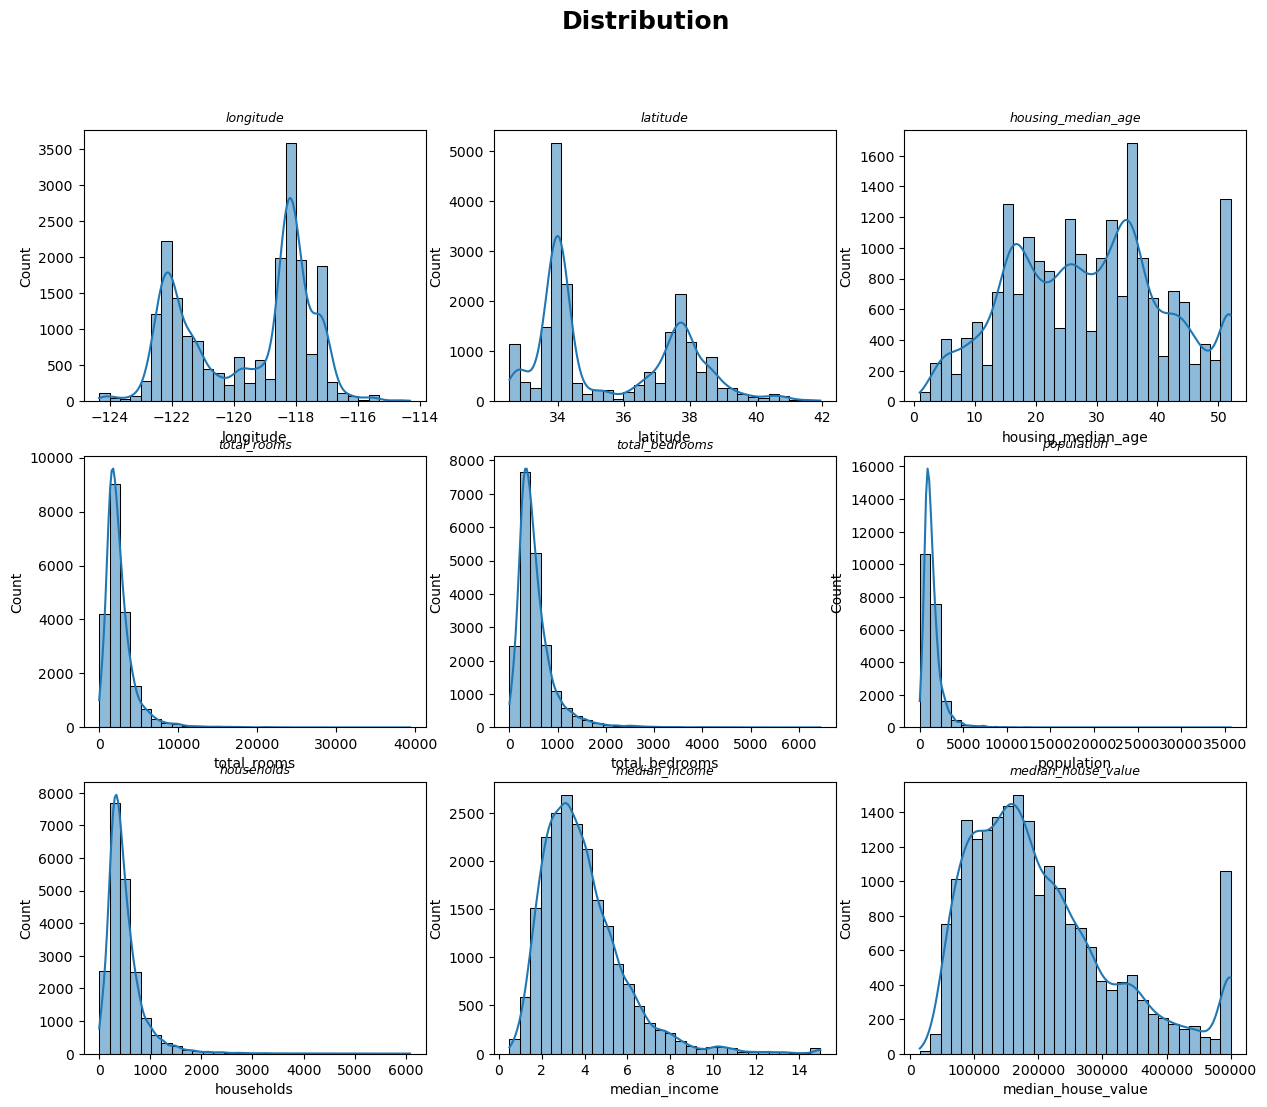

In [10]:
columns= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
fig, axes= plt.subplots(nrows =3, ncols =3, figsize=(15,12))
fig.suptitle("Distribution", fontsize =18, fontweight="bold")

for i, col in enumerate(columns[:9]):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=9, fontstyle="italic")

In [11]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary ={}

    numeric_cols = df.select_dtypes(include =["float64","int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)# quantile() ->veriyi alır büyükten küçüge sıralar
        Q3 = df[col].quantile(0.75)
        IQR =Q3 - Q1

        lower_bound = Q1 - threshold * IQR # q1 den threshold*ıqr kadar küçük olan degerler artık outlier demek.
        upper_bound = Q3 + threshold * IQR
        #yani burada alt sınır ve üst sınır belirlememizin sebebi
        # q1 den ne kadar küçük degerler için outlier diyelim
        # q3 den ne kadar büyük degerler için outlier diyelim

        outliers = df [(df[col] < lower_bound)| (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0]/ df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound" : upper_bound
            #her satır için tek tek outlier sayısının, yzüdesinin ve upper bound, lower bound yazdırma işlemi.

        }
    return pd.DataFrame(outlier_summary)

In [12]:
find_outliers_iqr(df, threshold=1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [13]:
cols_to_clean = [
    "median_house_value",   # target
    "total_rooms",
    "total_bedrooms",
    "population",
    "households"
]


In [14]:
def remove_outliers_from_column (df, target_col, threshold = 1.5):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR =Q3 - Q1

        lower_bound = Q1 - threshold * IQR 
        upper_bound = Q3 + threshold * IQR
        return  df [(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [15]:
def remove_outliers_from_all_columns(df):
    df_clean = df.copy()

    for col in cols_to_clean:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) & (df_clean[col] <= upper)
        ]

    return df_clean


In [16]:
print("original data shape: ", df.shape)

df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)

df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)


original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17040, 10)


In [17]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
df_all_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000
mean,-119.611626,35.707505,29.594718,2083.248239,427.108157,1150.280810,399.858216,3.645569,188831.144131
std,2.004492,2.169910,12.244657,1032.263156,201.468681,552.285717,186.847971,1.557703,95878.675313
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.940000,19.000000,1353.000000,282.000000,753.000000,267.000000,2.500000,112700.000000
50%,-118.640000,34.380000,30.000000,1942.000000,401.000000,1086.000000,379.000000,3.426300,170800.000000
75%,-118.020000,37.740000,38.000000,2700.000000,556.000000,1505.000000,521.000000,4.556350,244200.000000
max,-114.490000,41.950000,52.000000,5650.000000,1056.000000,2751.000000,913.000000,15.000100,482200.000000


In [19]:
df_all_clean["total_bedrooms"] = df_all_clean["total_bedrooms"].fillna(df_all_clean["total_bedrooms"].median())

In [20]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
from scipy.stats import skew

In [22]:
X = df_all_clean.drop("median_house_value", axis = 1)
y = df_all_clean["median_house_value"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pt_X =PowerTransformer(method ="yeo-johnson")

In [26]:
from scipy.stats import boxcox

In [27]:
cols_to_transform = [
    "total_rooms",
    "total_bedrooms",
    "population",
    "households"
]

In [28]:
for col in cols_to_transform:
    df_all_clean[col], _ = boxcox(df_all_clean[col])

In [29]:
df_all_clean[cols_to_transform].describe()

,total_rooms,total_bedrooms,population,households
count,17040.000000,17040.000000,17040.000000,17040.000000
mean,171.306475,78.930247,155.104193,89.170421
std,55.687253,26.381239,52.606406,30.983766
min,0.864284,0.879067,1.616285,0.890830
25%,135.331210,61.358892,120.216727,68.761928
50%,169.411625,77.817628,153.655439,88.144506
75%,207.828797,96.929559,191.117828,110.355020
max,328.191486,148.865048,285.795609,163.755614


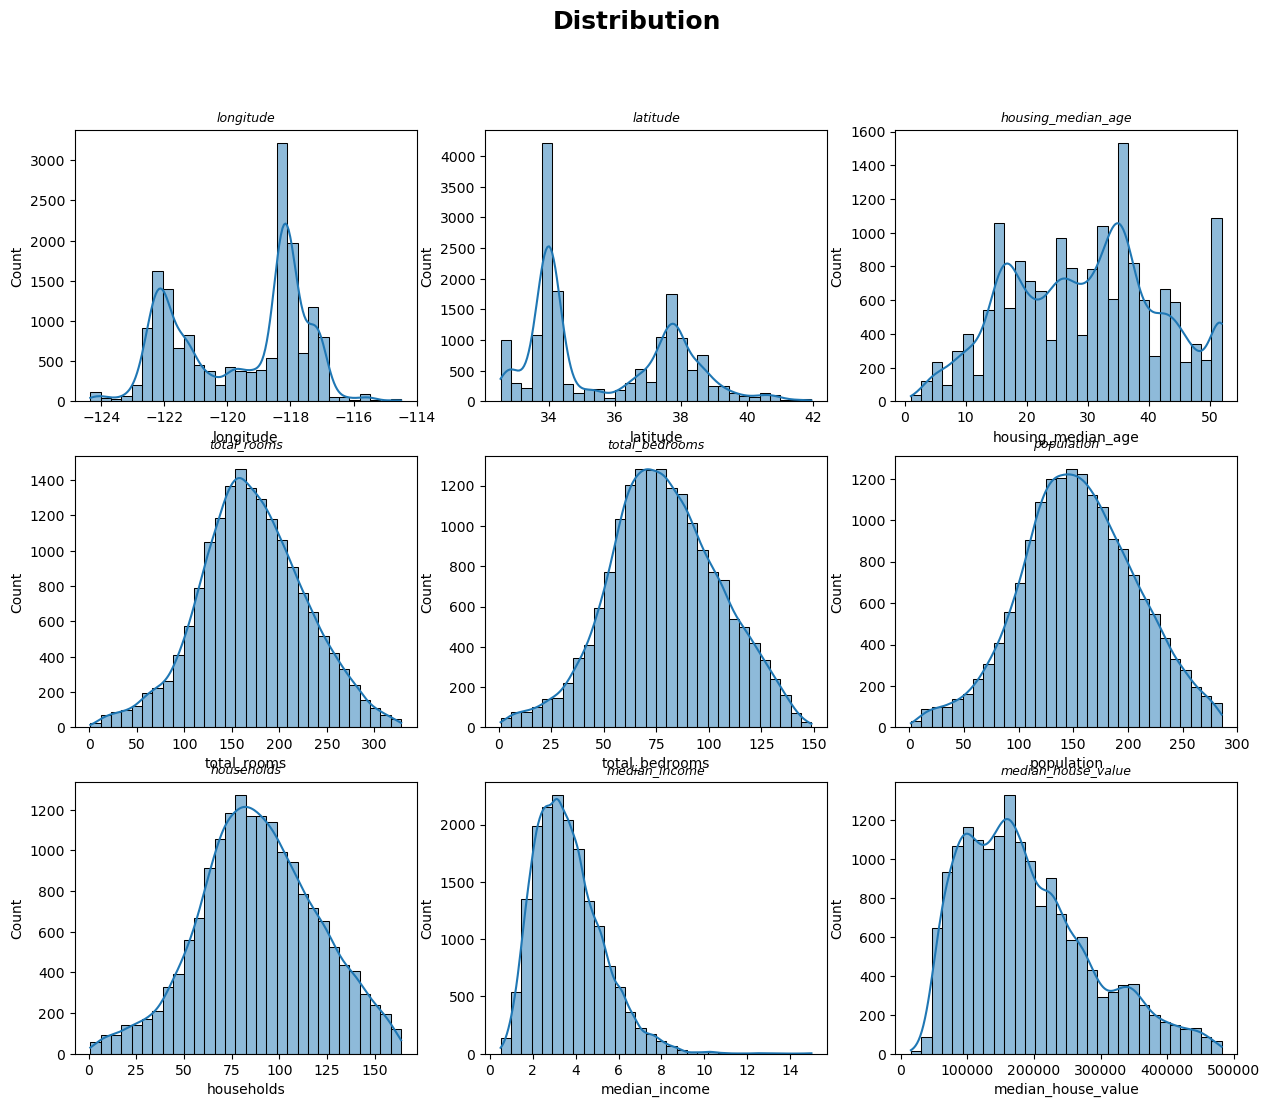

In [30]:
columns= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
fig, axes= plt.subplots(nrows =3, ncols =3, figsize=(15,12))
fig.suptitle("Distribution", fontsize =18, fontweight="bold")

for i, col in enumerate(columns[:9]):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df_all_clean, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=9, fontstyle="italic")

In [31]:
df[cols_to_transform].describe()


,total_rooms,total_bedrooms,population,households
count,20640.000000,20433.000000,20640.000000,20640.000000
mean,2635.763081,537.870553,1425.476744,499.539680
std,2181.615252,421.385070,1132.462122,382.329753
min,2.000000,1.000000,3.000000,1.000000
25%,1447.750000,296.000000,787.000000,280.000000
50%,2127.000000,435.000000,1166.000000,409.000000
75%,3148.000000,647.000000,1725.000000,605.000000
max,39320.000000,6445.000000,35682.000000,6082.000000


In [32]:
df_all_clean[cols_to_transform].describe()


,total_rooms,total_bedrooms,population,households
count,17040.000000,17040.000000,17040.000000,17040.000000
mean,171.306475,78.930247,155.104193,89.170421
std,55.687253,26.381239,52.606406,30.983766
min,0.864284,0.879067,1.616285,0.890830
25%,135.331210,61.358892,120.216727,68.761928
50%,169.411625,77.817628,153.655439,88.144506
75%,207.828797,96.929559,191.117828,110.355020
max,328.191486,148.865048,285.795609,163.755614


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["ocean_proximity"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

In [35]:
X = df_all_clean.drop("median_house_value", axis = 1)
y = df_all_clean["median_house_value"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [37]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_train, y_train_pred):
    mae = mean_absolute_error(y_train, y_train_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2 = r2_score(y_train, y_train_pred)
    return mae, rmse, r2


In [40]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(
        y_test, y_test_pred
    )

    print(list(models.keys())[i])
    print("Train RMSE:", model_train_rmse)
    print("Test RMSE :", model_test_rmse)
    print("-"*30)


Linear Regression
Train RMSE: 57198.27468110569
Test RMSE : 57802.13397196372
------------------------------
Lasso
Train RMSE: 57198.301192742285
Test RMSE : 57801.7657774225
------------------------------
Ridge
Train RMSE: 57201.38171367567
Test RMSE : 57795.77741851306
------------------------------
K Neighbors Regressor
Train RMSE: 66511.58751684942
Test RMSE : 82090.46095461183
------------------------------
Decision Tree
Train RMSE: 0.0
Test RMSE : 62723.35359707587
------------------------------
Random Forest Regressor
Train RMSE: 16803.536944423533
Test RMSE : 44076.615946653656
------------------------------
Adaboost Regressor
Train RMSE: 74423.17440041118
Test RMSE : 75676.96085787103
------------------------------
Gradient Boost Regressor
Train RMSE: 47562.16825632234
Test RMSE : 49237.12088462317
------------------------------
XGBoost Regressor
Train RMSE: 23200.470629225383
Test RMSE : 41642.9554536035
------------------------------


In [41]:
y_train_transformed, lambda_y =boxcox(y_train)

In [42]:
# (inverse Box-Cox)
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
pipeline.fit(X_train, y_train_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [66]:
y_train_transformed = pipeline.predict(X_train)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [68]:
print(X_train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [70]:
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_transformed)
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_p)

print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)


Train RMSE: 212058.5112625911
Test RMSE : 210888.52054765282
